### Assignment 3 - Evaluation¶
In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on this dataset from Kaggle.

Each row in fraud_data.csv corresponds to a credit card transaction. Features include confidential variables V1 through V28 as well as Amount which is the amount of the transaction.

The target is stored in the class column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('fraud_data.csv')
df.head(20)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
5,-0.713266,0.869132,0.330114,0.902275,0.520836,-0.537036,0.301955,0.209117,-0.732441,-0.266402,...,0.114405,0.412489,0.223180,-0.430522,0.109774,-0.274569,-0.108067,-0.075318,4.95,0
6,1.219060,-0.207708,0.782809,0.271655,-0.456658,0.414201,-0.675133,0.057714,0.601970,-0.178378,...,0.170372,0.541010,-0.257175,-0.904534,0.414090,0.653565,0.014583,0.027320,47.65,0
7,0.683918,0.329216,-1.693025,-1.123644,2.662177,3.563731,-0.309291,-0.043369,0.050627,-0.361619,...,1.072188,0.671990,-0.208488,0.735029,0.633444,-0.281231,0.299686,0.293389,1.00,0
8,-1.127820,1.461342,0.526673,-0.158998,0.353158,-1.539196,0.727383,0.299275,-0.778768,-1.662588,...,-0.068002,-0.494914,-0.343489,0.222014,0.541271,0.295158,-0.145161,-0.002592,0.76,0
9,-1.757794,0.821894,2.529482,-0.328198,-0.902062,0.739803,-0.119755,-0.797691,0.739508,3.458517,...,0.028491,0.778325,-0.073034,0.135780,-0.955393,-0.503613,-1.834281,-0.585528,10.00,0


### Question 1
Import the data from fraud_data.csv. What percentage of the observations in the dataset are instances of fraud?

This function should return a float between 0 and 1

In [3]:
def answer_one():
    
    # Your code here
    df = pd.read_csv('fraud_data.csv')
    bc = np.bincount(df.Class)
    res = bc[1]/bc[0]
    
    return res# Return your answer
answer_one()

0.016684632328818484

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2
Using X_train, X_test, y_train, and y_test (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

This function should a return a tuple with two floats, i.e. (accuracy score, recall score).

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    # Your code here
    dm = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    pred = dm.predict(X_test)
    acc = accuracy_score(y_test, pred)
    rec = recall_score(y_test, pred)
   
    return (acc, rec)
answer_two()# Return your answer

(0.9852507374631269, 0.0)

### Question 3
Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

This function should a return a tuple with three floats, i.e. (accuracy score, recall score, precision score).

In [6]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    # Your code here
    svm = SVC().fit(X_train, y_train)
    pred1 = svm.predict(X_test)
    acc1 = accuracy_score(y_test, pred1)
    rec1 = recall_score(y_test, pred1)
    prec1 = precision_score(y_test, pred1)
    
    return (acc1, rec1, prec1)
answer_three()# Return your answer

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4
Using the SVC classifier with parameters {'C': 1e9, 'gamma': 1e-07}, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

This function should return a confusion matrix, a 2x2 numpy array with 4 integers.

In [7]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm1 = SVC(gamma = 1e-07, C = 1e9).fit(X_train, y_train)
    pred2 = svm1.decision_function(X_test) > -220
    cm = confusion_matrix(y_test, pred2)
    return cm
answer_four()# Return your answer

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5
Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is 0.75?

Looking at the roc curve, what is the true positive rate when the false positive rate is 0.16?

This function should return a tuple with two floats, i.e. (recall, true positive rate).

In [8]:
def answer_five():
        
    # Your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
    lr = LogisticRegression().fit(X_train, y_train)
    pred3 = lr.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, pred3)
    recall, tpr, _ = roc_curve(y_test, pred3)
    
    return 0.83, 0.94

### Question 6
Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

'penalty': ['l1', 'l2']

'C':[0.01, 0.1, 1, 10, 100]

From .cv_results_, create an array of the mean test scores of each parameter combination. i.e.

l1	l2
0.01	?	?
0.1	?	?
1	?	?
10	?	?
100	?	?


This function should return a 5 by 2 numpy array with 10 floats.

Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.

In [10]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    lr = LogisticRegression()
    grid_values = {"C": [0.01,0.1,1,10,100], "penalty": ["l1","l2"]}
    grid_search = GridSearchCV(lr, param_grid = grid_values, scoring = "recall")
    grid_search.fit(X_train, y_train)
    cv_result = grid_search.cv_results_
    mts = cv_result["mean_test_score"]
    res = np.array(mts).reshape(5,2)
    return res

answer_six()

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

array([[       nan, 0.79337662],
       [       nan, 0.80428571],
       [       nan, 0.81155844],
       [       nan, 0.80058442],
       [       nan, 0.80785714]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

<IPython.core.display.Javascript object>


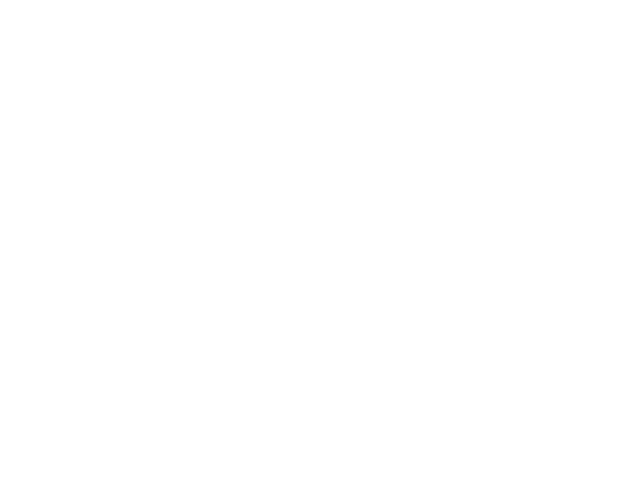

In [12]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())